### DFTSNN - DFT Encoded dataset

The imaginary and real values are parellel processed until concatenation.

In [29]:
# (r + 1) | (q - 1)
# (r + 1) | n
# q is a prime number
# n = 2^t
# r < n

In [30]:
%reset -f
import gc
gc.collect()

31442

In [31]:
w0 = 4
z0 = 3

In [32]:
import numpy as np

np.random.seed(42)

n = 27
q = 7
num_samples = 1000

def next_power_of_two(x):
    return 1 if x == 0 else 2**(x - 1).bit_length()

n_padded = next_power_of_two(n)

dataset = np.random.randint(0, q, size=(num_samples, n))

if n_padded > n:
    pad_width = n_padded - n
    dataset = np.pad(dataset, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)

print("Original n:", n)
print("Padded n:", n_padded)
print("Generated dataset shape:", dataset.shape)

Original n: 27
Padded n: 32
Generated dataset shape: (1000, 32)


In [33]:
print(dataset)
print(dataset.shape)
print(dataset[0].shape)

[[6 3 4 ... 0 0 0]
 [1 5 4 ... 0 0 0]
 [0 6 1 ... 0 0 0]
 ...
 [4 1 1 ... 0 0 0]
 [6 1 2 ... 0 0 0]
 [1 5 4 ... 0 0 0]]
(1000, 32)
(32,)


$$
\tilde{M}_{kj} = \left[ \left( \frac{w_0}{z_0} \right)^j \zeta^{kj} \right]_{k,j=0}^{n-1}
$$

In [34]:
def padded_generator_matrix(N, w0, z0):
    n = np.arange(N)
    k = n.reshape((N, 1))
    zeta = np.exp(-2j * np.pi / N)
    M_tilde = ((w0 / z0) ** n) * (zeta ** (k * n))
    return M_tilde

In [35]:
M_tilde = padded_generator_matrix(n_padded, w0, z0)
print(M_tilde.shape)

(32, 32)


In [36]:
encoded_dataset = np.array([np.dot(M_tilde, x) for x in dataset])
encoded_dataset[np.abs(encoded_dataset) < 1e-10] = 0
encoded_dataset = np.round(encoded_dataset, decimals=10)
print(encoded_dataset)

[[ 18563.60052945    +0.j          -3175.07412411+14542.65392496j
   -9480.13851167 -1549.89213738j ...   -850.18419129 +5788.51248279j
   -9480.13851167 +1549.89213738j  -3175.07412411-14542.65392496j]
 [ 26201.57565547    +0.j           -888.79870167+21381.54383229j
  -15711.89592314 +4225.02464251j ...  -8448.43948841+12321.54894128j
  -15711.89592314 -4225.02464251j   -888.79870167-21381.54383229j]
 [ 18708.3418798     +0.j          -3692.76914231+14315.81246485j
   -8001.63897938 -1445.78154582j ...  -2196.87866369 +4388.0650906j
   -8001.63897938 +1445.78154582j  -3692.76914231-14315.81246485j]
 ...
 [ 23026.93389135    +0.j          -1109.76273792+19062.65254237j
  -13040.7009937  +1311.43274328j ...  -3589.38928495 +6599.51636282j
  -13040.7009937  -1311.43274328j  -1109.76273792-19062.65254237j]
 [ 13466.17623911    +0.j          -3519.32538663 +9603.71035865j
   -6399.29947006 -1233.3778371j  ...  -1243.67319172 +6320.28545061j
   -6399.29947006 +1233.3778371j   -3519.3253866

In [37]:
print(encoded_dataset.shape)

(1000, 32)


In [38]:
print(dataset[0])
print(encoded_dataset[0])

[6 3 4 6 2 4 4 6 1 2 6 2 2 4 3 2 5 4 1 3 5 5 1 3 4 0 3 0 0 0 0 0]
[18563.60052945    +0.j         -3175.07412411+14542.65392496j
 -9480.13851167 -1549.89213738j  -850.18419129 -5788.51248279j
  2813.63372348 -2457.36436449j  3312.0476391   +337.88077825j
  1059.2907911  +3489.68169028j -2366.82367016  +909.74502726j
  -210.29906943  +357.85181443j -3878.07651347  +373.95548592j
   -49.25036994 -6370.32567308j  6901.71964373 -1088.5938127j
  2896.76301761 +7252.43377368j -6714.83312544 +4427.90575271j
 -5496.28870703 -5330.43278044j  2828.24226801 -6162.17891893j
  6446.94186958    -0.j          2828.24226801 +6162.17891893j
 -5496.28870703 +5330.43278044j -6714.83312544 -4427.90575271j
  2896.76301761 -7252.43377368j  6901.71964373 +1088.5938127j
   -49.25036994 +6370.32567308j -3878.07651347  -373.95548592j
  -210.29906943  -357.85181443j -2366.82367016  -909.74502726j
  1059.2907911  -3489.68169028j  3312.0476391   -337.88077825j
  2813.63372348 +2457.36436449j  -850.18419129 +5788.5

In [39]:
X_real = np.real(encoded_dataset).astype(np.float32)
X_imag = np.imag(encoded_dataset).astype(np.float32)

print("\nX_train_real :", X_real.shape)
print(X_real[0])
print("\nX_train_imag :", X_imag.shape)
print(X_imag[0])


X_train_real : (1000, 32)
[18563.6     -3175.0742  -9480.139    -850.1842   2813.6338   3312.0476
  1059.2908  -2366.8237   -210.29907 -3878.0764    -49.25037  6901.7197
  2896.763   -6714.833   -5496.2886   2828.2422   6446.942    2828.2422
 -5496.2886  -6714.833    2896.763    6901.7197    -49.25037 -3878.0764
  -210.29907 -2366.8237   1059.2908   3312.0476   2813.6338   -850.1842
 -9480.139   -3175.0742 ]

X_train_imag : (1000, 32)
[     0.       14542.654    -1549.8921   -5788.5127   -2457.3643
    337.88077   3489.6816     909.74506    357.8518     373.95547
  -6370.3257   -1088.5939    7252.4336    4427.906    -5330.4326
  -6162.1787      -0.        6162.1787    5330.4326   -4427.906
  -7252.4336    1088.5939    6370.3257    -373.95547   -357.8518
   -909.74506  -3489.6816    -337.88077   2457.3643    5788.5127
   1549.8921  -14542.654  ]


In [40]:
mean_real = np.mean(X_real, axis=0)
std_real = np.std(X_real, axis=0) + 1e-8  # Avoid division by zero
X_real = (X_real - mean_real) / std_real

mean_imag = np.mean(X_imag, axis=0)
std_imag = np.std(X_imag, axis=0) + 1e-8  # Avoid division by zero
X_imag = (X_imag - mean_imag) / std_imag

print(X_real[0])
print(X_imag[0])

[-0.5349025  -0.6596515   0.7757606   0.5577905  -0.9361864  -0.52822787
  0.26922125  0.5281825   0.72306824 -1.3387995  -0.9591273   1.0555125
  1.3157916  -0.90254843 -0.8986112   0.8085635   0.6702558   0.8085635
 -0.8986112  -0.90254843  1.3157916   1.0555125  -0.9591273  -1.3387995
  0.72306824  0.5281825   0.26922125 -0.52822787 -0.9361864   0.5577905
  0.7757606  -0.6596515 ]
[ 0.0000000e+00 -6.2298882e-01 -6.1096108e-01  9.1586119e-01
  5.5390155e-01 -7.0446509e-01 -4.5943576e-01 -2.8642637e-01
  9.1341501e-01  1.0008837e+00 -1.3572260e+00 -1.1246126e+00
  9.5678961e-01  1.1653606e+00 -9.0699339e-01 -7.2105145e-01
  1.9968052e-04  7.2105145e-01  9.0699339e-01 -1.1653606e+00
 -9.5678961e-01  1.1246126e+00  1.3572260e+00 -1.0008837e+00
 -9.1341501e-01  2.8642637e-01  4.5943576e-01  7.0446509e-01
 -5.5390155e-01 -9.1586119e-01  6.1096108e-01  6.2298882e-01]


In [41]:
# normalize target data (integers 0-q to [0, 1])
y_normalized = dataset.astype(np.float32) / (q - 1)  # Scale to [0, 1]
print("y: ")
print(dataset.astype(np.float32)[0])
print("\ny_normalized: ")
print(y_normalized[0])

labels = y_normalized

y: 
[6. 3. 4. 6. 2. 4. 4. 6. 1. 2. 6. 2. 2. 4. 3. 2. 5. 4. 1. 3. 5. 5. 1. 3.
 4. 0. 3. 0. 0. 0. 0. 0.]

y_normalized: 
[1.         0.5        0.6666667  1.         0.33333334 0.6666667
 0.6666667  1.         0.16666667 0.33333334 1.         0.33333334
 0.33333334 0.6666667  0.5        0.33333334 0.8333333  0.6666667
 0.16666667 0.5        0.8333333  0.8333333  0.16666667 0.5
 0.6666667  0.         0.5        0.         0.         0.
 0.         0.        ]


In [42]:
from sklearn.model_selection import train_test_split

X_real_train, X_real_test, y_train, y_test = train_test_split(
    X_real, labels, test_size=0.2, random_state=42
)

X_imag_train, X_imag_test, _, _ = train_test_split(
    X_imag, labels, test_size=0.2, random_state=42
)

print("Training data shapes: X_real:", X_real_train.shape, "X_imag:", X_imag_train.shape, "y:", y_train.shape)
print("Testing data shapes: X_real:", X_real_test.shape, "X_imag:", X_imag_test.shape, "y:", y_test.shape)

Training data shapes: X_real: (800, 32) X_imag: (800, 32) y: (800, 32)
Testing data shapes: X_real: (200, 32) X_imag: (200, 32) y: (200, 32)


In [43]:
print(X_real_train.shape[1])
print(X_real_test.shape[1])
print(X_imag_train.shape[1])
print(X_imag_test.shape[1])
print(y_train.shape[1])
print(y_test.shape[1])

32
32
32
32
32
32


In [44]:
input_dim = X_real_train.shape[1]
output_dim = y_train.shape[1]
print(input_dim)
print(output_dim)

32
32


IDFT - Structure Imposed Neural Network

In [45]:
import tensorflow as tf

In [46]:
class FirstLayer(tf.keras.layers.Layer):
    def __init__(self, units, kernel_initializer='he_normal', bias_initializer='zeros', use_bias=True, **kwargs):
        super(FirstLayer, self).__init__(**kwargs)
        self.units = units  # Features/neurons
        self.kernel_initializer = kernel_initializer
        self.bias_initializer = bias_initializer
        self.use_bias = use_bias

    def build(self, input_shape):
        n = self.units
        n1 = n // 2
        num_blocks = n1 // 2

        self.b_1 = self.add_weight(name="kernel_b1",
                                   shape=(num_blocks, 2, 2),
                                   initializer=tf.keras.initializers.get(self.kernel_initializer),
                                   trainable=True)
        self.b_2 = self.add_weight(name="kernel_b2",
                                   shape=(num_blocks, 2, 2),
                                   initializer=tf.keras.initializers.get(self.kernel_initializer),
                                   trainable=True)
        self.d_1 = self.add_weight(name="kernel_d1",
                                   shape=(n1 - 2,),
                                   initializer=tf.keras.initializers.get(self.kernel_initializer),
                                   trainable=True)
        self.d_2 = self.add_weight(name="kernel_d2",
                                   shape=(n1 - 2,),
                                   initializer=tf.keras.initializers.get(self.kernel_initializer),
                                   trainable=True)

        if self.use_bias:
            self.bias = self.add_weight(name="bias",
                                        shape=(self.units,),
                                        initializer=tf.keras.initializers.get(self.bias_initializer),
                                        trainable=True)

    def call(self, inputs):
        def recursiveIDFT(inputVector, B, d, block_index):
            n = inputVector.shape[1]
            n1 = n // 2

            if n == 2:
                out = tf.matmul(inputVector, B[block_index])
                return out
            else:
                q = tf.concat([inputVector[:, ::2], inputVector[:, 1::2]], axis=1)

                B1 = recursiveIDFT(q[:, :n1], B, d[n1:], block_index)
                B2 = recursiveIDFT(q[:, n1:], B, d[n1:], block_index + (n // 4))

                d_n = tf.reshape(d[:n1], (1, -1))
                z1 = tf.concat([(B1 + tf.multiply(B2, d_n)), (B1 - tf.multiply(B2, d_n))], axis=1)

                return z1 / tf.sqrt(tf.constant(2.0, dtype=tf.float32))

        n = self.units
        n1 = n // 2

        q = tf.concat([inputs[:, ::2], inputs[:, 1::2]], axis=1)

        B1 = recursiveIDFT(q[:, :n1], self.b_1, self.d_1, block_index=0)
        B2 = recursiveIDFT(q[:, n1:], self.b_2, self.d_2, block_index=0)

        out = tf.concat([B1, B2], axis=1)

        if self.use_bias:
            out += self.bias

        return out

In [47]:
class SecondLayer(tf.keras.layers.Layer):
    def __init__(self, units, kernel_initializer='he_normal', bias_initializer='zeros', use_bias=True, **kwargs):
        super(SecondLayer, self).__init__(**kwargs)
        self.units = units  # Features/neurons
        self.kernel_initializer = kernel_initializer
        self.bias_initializer = bias_initializer
        self.use_bias = use_bias

    def build(self, input_shape):
        n = self.units
        n1 = n // 2

        self.d_1 = self.add_weight(name="kernel_d1",
                                   shape=(n1,),
                                   initializer=tf.keras.initializers.get(self.kernel_initializer),
                                   trainable=True)

        if self.use_bias:
            self.bias = self.add_weight(name="bias",
                                        shape=(n,),
                                        initializer=tf.keras.initializers.get(self.bias_initializer),
                                        trainable=True)

    def call(self, inputs):
        out1 = inputs[:, :int(inputs.shape[1] / 2)]
        out2 = inputs[:, int(inputs.shape[1] / 2):]

        z1 = tf.concat([(out1 + tf.multiply(out2, self.d_1)), (out1 - tf.multiply(out2, self.d_1))], axis=1)
        out = z1 / tf.sqrt(tf.constant(2.0, dtype=tf.float32))

        if self.use_bias:
            out += self.bias

        return out

In [48]:
class CustomLayer(tf.keras.layers.Layer):
    def __init__(self, units, kernel_initializer='he_normal', bias_initializer='zeros', use_bias=True, **kwargs):
        super(CustomLayer, self).__init__(**kwargs)
        self.units = units  # features/neurons
        self.kernel_initializer = kernel_initializer
        self.bias_initializer = bias_initializer
        self.use_bias = use_bias

    def build(self, input_shape):
        n = self.units

        self.m = self.add_weight(name="kernel_m",
                                 shape=(n,),
                                 initializer=tf.keras.initializers.get(self.kernel_initializer),
                                 trainable=True)

        if self.use_bias:
            self.bias = self.add_weight(name="bias",
                                        shape=(self.units,),
                                        initializer=tf.keras.initializers.get(self.bias_initializer),
                                        trainable=True)

    def call(self, inputs):
        out = tf.multiply(inputs, self.m)
        if self.use_bias:
            out += self.bias
        return out

In [49]:
class ScalingLayer(tf.keras.layers.Layer):
    def __init__(self, units, initial_scale=0.1, kernel_initializer='ones', bias_initializer='zeros', use_bias=True, **kwargs):
        super(ScalingLayer, self).__init__(**kwargs)
        self.units = units
        self.kernel_initializer = kernel_initializer
        self.bias_initializer = bias_initializer
        self.use_bias = use_bias
        self.initial_scale = initial_scale

    def build(self, input_shape):
        n = self.units

        self.m = self.add_weight(name="kernel_m_1",
                                 shape=(n,),
                                 initializer=tf.keras.initializers.get(self.kernel_initializer),
                                 regularizer=tf.keras.regularizers.l2(1e-4),
                                 trainable=True)

        # self.scale = self.add_weight(name="kernel_scale",
        #                              shape=(),
        #                              initializer=tf.keras.initializers.Constant(1.0),
        #                              regularizer=tf.keras.regularizers.l2(1e-4),
        #                              trainable=True)

        self.log_scale = self.add_weight(
                                  shape=(),
                                  initializer=tf.keras.initializers.Constant(self.initial_scale),
                                  trainable=True,
                                  name="log_scale",
                                  )

        if self.use_bias:
            self.bias = self.add_weight(name="bias",
                                        shape=(self.units,),
                                        initializer=tf.keras.initializers.get(self.bias_initializer),
                                        trainable=True)

    def call(self, inputs):
        # print("linear layer input:", inputs.shape)

        inputs1 = inputs[:, :int(inputs.shape[1] / 2)]
        inputs2 = inputs[:, int(inputs.shape[1] / 2):]

        out = tf.math.sqrt(inputs1**2 + inputs2**2)

        dim = tf.shape(out)[1]
        # D_hat_n = tf.pow(self.scale, tf.cast(tf.range(dim), dtype=tf.float32))
        D_hat_n = tf.exp(self.log_scale * tf.cast(tf.range(dim), tf.float32))

        out2 = out * D_hat_n * self.m

        # out = tf.multiply(out, self.m) # diagonal scaling

        if self.use_bias:
            out2 += self.bias

        # print("linear layer output:", out.shape)
        return out2

Build Model

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Concatenate, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam

global initial_log_scale
initial_log_scale = np.log(z0 / w0)

def structured_NN(input_dim, output_dim):
    real_input = Input(shape=(input_dim,), name="real_input")
    imag_input = Input(shape=(input_dim,), name="imag_input")

    real_x = FirstLayer(units=input_dim, kernel_initializer='he_normal', bias_initializer='zeros', name="real_layer1")(real_input)
    real_x = LeakyReLU(alpha=0.1)(real_x)
    real_x = CustomLayer(units=input_dim, kernel_initializer='he_normal', bias_initializer='zeros', name="real_support_layer_1")(real_x)
    real_x = LeakyReLU(alpha=0.1)(real_x)
    real_x = SecondLayer(units=input_dim, kernel_initializer='he_normal', bias_initializer='zeros', name="real_layer2")(real_x)
    real_x = LeakyReLU(alpha=0.1)(real_x)

    imag_x = FirstLayer(units=input_dim, kernel_initializer='he_normal', bias_initializer='zeros', name="imag_layer1")(imag_input)
    imag_x = LeakyReLU(alpha=0.1)(imag_x)
    imag_x = CustomLayer(units=input_dim, kernel_initializer='he_normal', bias_initializer='zeros', name="imag_support_layer_1")(imag_x)
    imag_x = LeakyReLU(alpha=0.1)(imag_x)
    imag_x = SecondLayer(units=input_dim, kernel_initializer='he_normal', bias_initializer='zeros', name="imag_layer2")(imag_x)
    imag_x = LeakyReLU(alpha=0.1)(imag_x)

    merged = Concatenate(name="merge_real_imag")([real_x, imag_x])

    output = ScalingLayer(units=output_dim, initial_scale=initial_log_scale, kernel_initializer='ones', bias_initializer='zeros', name="output_layer")(merged)
    output = Activation('linear')(output)

    model = Model(inputs=[real_input, imag_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse', 'mae'])

    return model

input_dim = X_real_train.shape[1]
output_dim = y_train.shape[1]
model = structured_NN(input_dim, output_dim)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ real_input (InputLayer)   │ (None, 32)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ imag_input (InputLayer)   │ (None, 32)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ real_layer1 (FirstLayer)  │ (None, 32)             │            124 │ real_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ imag_layer1 (FirstLayer)  │ (None, 32)             │            124 │ imag_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_4 (LeakyReLU) │ (None, 32)             │              0 │ real_layer1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_7 (LeakyReLU) │ (None, 32)             │              0 │ imag_layer1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ real_support_layer_1      │ (None, 32)             │             64 │ leaky_re_lu_4[0][0]    │
│ (CustomLayer)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ imag_support_layer_1      │ (None, 32)             │             64 │ leaky_re_lu_7[0][0]    │
│ (CustomLayer)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_5 (LeakyReLU) │ (None, 32)             │              0 │ real_support_layer_1[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_8 (LeakyReLU) │ (None, 32)             │              0 │ imag_support_layer_1[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ real_layer2 (SecondLayer) │ (None, 32)             │             48 │ leaky_re_lu_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ imag_layer2 (SecondLayer) │ (None, 32)             │             48 │ leaky_re_lu_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_6 (LeakyReLU) │ (None, 32)             │              0 │ real_layer2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_9 (LeakyReLU) │ (None, 32)             │              0 │ imag_layer2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ merge_real_imag           │ (None, 64)             │              0 │ leaky_re_lu_6[0][0],   │
│ (Concatenate)             │                        │                │ leaky_re_lu_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_layer              │ (None, 32)             │             65 │ merge_real_imag[0][0]  │
│ (ScalingLayer)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 32)             │              0 │ output_layer[0][0]     │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 537 (2.10 KB)

 Trainable params: 537 (2.10 KB)

 Non-trainable params: 0 (0.00 B)

Train Model

In [51]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

adjust_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

In [52]:
history = model.fit(
    [X_real_train, X_imag_train],
    y_train,
    epochs=500,
    batch_size=32,
    validation_data=([X_real_test, X_imag_test], y_test),
    callbacks=[adjust_lr, early_stopping]
)

Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - loss: 0.3016 - mae: 0.4182 - mse: 0.2984 - val_loss: 0.2723 - val_mae: 0.3935 - val_mse: 0.2692 - learning_rate: 0.0010
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2751 - mae: 0.3972 - mse: 0.2720 - val_loss: 0.2440 - val_mae: 0.3705 - val_mse: 0.2409 - learning_rate: 0.0010
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2452 - mae: 0.3722 - mse: 0.2421 - val_loss: 0.2152 - val_mae: 0.3458 - val_mse: 0.2121 - learning_rate: 0.0010
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2151 - mae: 0.3466 - mse: 0.2120 - val_loss: 0.1839 - val_mae: 0.3180 - val_mse: 0.1807 - learning_rate: 0.0010
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1811 - mae: 0.3165 - mse: 0.1778 - val_loss: 0.1469 - val_mae: 0.2858 - val_mse: 0.1435 - learning_rate: 0.0010
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1427 - mae: 0.2842 - mse: 0.1393 - val_loss: 0.1104 - val_mae: 0.2561 

Evaluate Model

In [53]:
test_loss, test_mse, test_mae = model.evaluate([X_real_test, X_imag_test], y_test)
print(f"Test MSE: {test_mse:.4f}, Test MAE: {test_mae:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0601 - mae: 0.1618 - mse: 0.0588 
Test MSE: 0.0598, Test MAE: 0.1640


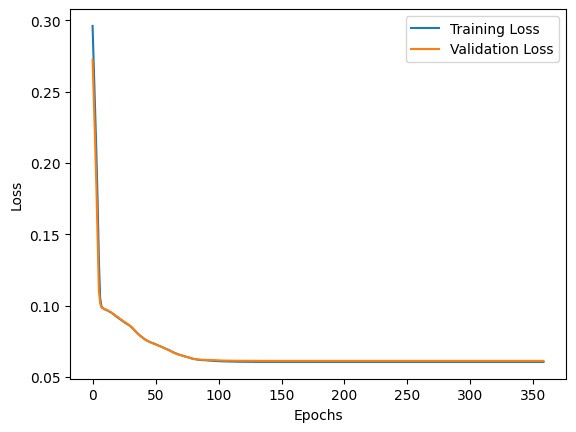

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [55]:
y_pred_test = model.predict([X_real_test, X_imag_test])
y_pred_test_rescaled = y_pred_test * (q - 1)
y_test_rescaled = y_test * (q - 1)

print("Comparison of predictions and ground truth:")
for i in range(3):
    print(f"Sample {i+1}:")
    print(f"  Predicted:    {np.abs(np.round(y_pred_test_rescaled[i]))}")
    print(f"  Ground Truth: {np.round(y_test_rescaled[i])}")
    print("-" * 40)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step
Comparison of predictions and ground truth:
Sample 1:
  Predicted:    [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 5. 1. 3. 2. 4. 4. 6. 5.
 2. 3. 1. 0. 0. 0. 0. 0.]
  Ground Truth: [5. 6. 5. 1. 3. 4. 1. 1. 6. 2. 3. 1. 4. 0. 3. 2. 5. 1. 4. 3. 4. 4. 6. 5.
 2. 3. 1. 0. 0. 0. 0. 0.]
----------------------------------------
Sample 2:
  Predicted:    [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 1. 1. 3. 1. 1. 5. 2. 1.
 4. 0. 4. 0. 0. 0. 0. 0.]
  Ground Truth: [1. 4. 1. 3. 3. 3. 0. 5. 5. 2. 4. 3. 3. 1. 3. 1. 1. 2. 0. 1. 1. 5. 2. 1.
 4. 0. 4. 0. 0. 0. 0. 0.]
----------------------------------------
Sample 3:
  Predicted:    [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 5. 1. 3. 6. 0. 4. 3. 2.
 3. 4. 4. 0. 0. 0. 0. 0.]
  Ground Truth: [2. 6. 0. 2. 2. 1. 3. 4. 2. 6. 4. 1. 0. 5. 2. 3. 5. 1. 4. 6. 0. 4. 3. 2.
 3. 4. 4. 0. 0. 0. 0. 0.]
----------------------------------------


predict on unseen data

In [56]:
num_unseen_samples = 3
unseen_data = np.random.randint(0, q, size=(num_unseen_samples, n))

padded_unseen_data = np.hstack((unseen_data, np.zeros((num_unseen_samples, n_padded - n))))

unseen_data_normalized = unseen_data.astype(np.float32) / (q - 1)

# print("Unseen Input Data (Before Encoding):")
# print(unseen_data)

# unseen_encoded = np.array([dft(message, n_padded) for message in padded_unseen_data])
unseen_encoded = np.array([np.dot(M_tilde, x) for x in padded_unseen_data])
unseen_encoded[np.abs(unseen_encoded) < 1e-10] = 0
unseen_encoded = np.round(unseen_encoded, decimals=10)

X_real_unseen = np.real(unseen_encoded).astype(np.float32)
X_imag_unseen = np.imag(unseen_encoded).astype(np.float32)

# print("\nEncoded Unseen Data (Real and Imaginary Parts):")
# print("Real Part Shape:", X_real_unseen.shape)
# print("Imaginary Part Shape:", X_imag_unseen.shape)

y_pred_unseen = model.predict([X_real_unseen, X_imag_unseen])

y_pred_unseen_rescaled = y_pred_unseen * (q - 1)

y_pred_unseen_final = np.mod(np.round(y_pred_unseen_rescaled), q)

print("\nComparison of Unseen Data and Predictions:")
print("=" * 60)
for i in range(num_unseen_samples):
    print(f"Sample {i+1}:")
    print(f"  Ground Truth: {padded_unseen_data[i].astype(int)}")
    print(f"  Prediction  : {y_pred_unseen_final[i].astype(int)}")
    print("-" * 60)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Comparison of Unseen Data and Predictions:
Sample 1:
  Ground Truth: [0 5 3 5 5 5 3 5 3 4 6 0 1 5 2 4 2 1 3 1 2 1 0 1 5 0 5 0 0 0 0 0]
  Prediction  : [1 2 2 6 0 0 5 2 3 5 2 5 6 0 4 6 4 3 5 3 2 0 2 5 1 6 2 0 2 0 0 0]
------------------------------------------------------------
Sample 2:
  Ground Truth: [6 6 1 0 0 6 1 4 3 3 3 0 6 3 6 0 6 4 1 6 6 1 0 0 6 4 3 0 0 0 0 0]
  Prediction  : [4 2 6 4 2 6 4 3 5 1 0 0 2 5 2 6 5 6 3 1 4 1 3 3 5 1 2 0 0 0 0 0]
------------------------------------------------------------
Sample 3:
  Ground Truth: [4 1 1 5 3 6 1 5 0 1 2 3 5 3 3 2 4 0 3 1 0 1 0 6 0 5 1 0 0 0 0 0]
  Prediction  : [4 0 5 2 5 2 2 3 5 1 1 2 5 6 6 0 3 2 5 0 6 3 3 1 0 6 1 0 1 0 0 0]
------------------------------------------------------------


Check gradient flow